In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection,preprocessing, neighbors,metrics
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import numpy as np
import testing_custom, training_custom

In [2]:
path="C:/Users/Harsh/Desktop/hw5/"

In [3]:
# creating a np array for dtc (Decision tree classifier) and knn 
dtc = np.array([])
knn = np.array([])
knn = knn.astype('float64')

In [4]:
x_train =[]
x_test =[]
y_train =[]
y_test =[]
max_neighbors =30

In [5]:
df = pd.read_table(path+ "iris.data", sep=",", header=None, names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['class'] = pd.Categorical(df['class']) #conversion to numerical data
df['class'] = df['class'].cat.codes

In [7]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#5-fold cross validation
cv = model_selection.KFold(n_splits=5)

In [9]:
x = df[df.columns[:-1]].values #target label creation
y = df['class'].values

In [12]:
# x and y shuffle before splitting
x, y = shuffle(x, y, random_state = 999)

In [13]:
# data set split into 5 cross valdiation 
for i, j in cv.split(df):
    x_train.append(x[i])
    x_test.append(x[j])
    y_train.append(y[i])
    y_test.append(y[j])

In [14]:
#converting into arrays, dimensions printed and saved as .txt file
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

for i in range(0,5):
    np.savetxt(path+ "train.csv/x_train_"+str(i)+".csv", x_train[i], delimiter=",")
    np.savetxt(path+ "train.csv/y_train_"+str(i)+".csv", y_train[i], delimiter=",")    
    np.savetxt(path+ "test.csv/x_test_"+str(i)+".csv", x_test[i], delimiter=",")    
    np.savetxt(path+ "test.csv/y_test_"+str(i)+".csv", y_test[i], delimiter=",")

(5, 120, 4)
(5, 120)
(5, 30, 4)
(5, 30)


In [15]:
for i in range(5):
    training_custom.create_dtc(i) # train and save model for dtc as .txt file
    training_custom.create_knn(i,max_neighbors) #train and save model for knn for different values of k as .txt file
    dtc_avg = testing_custom.run_dtc(i) # load model from txt
    knn_avg = testing_custom.run_knn(i,max_neighbors) #Load model from txt
    print(dtc_avg) #print accuracy for dtc
    dtc = np.append(dtc,dtc_avg) #returns value to calculate average
    print(knn_avg) #print knn accuracy
    knn = np.append(knn,knn_avg) #returns value to calculate average

0.9333333333333333
[0.93333333 0.93333333 0.93333333 0.93333333 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.93333333 0.93333333 0.93333333
 0.9        0.93333333 0.93333333 0.93333333 0.93333333 0.93333333]
0.9666666666666667
[1.         0.96666667 1.         1.         1.         0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333
 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333 0.9
 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333]
1.0
[0.96666667 1.         0.96666667 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
0.9

In [19]:
knn = knn.reshape(int(max_neighbors/6),max_neighbors) #matrix reshaping
knn_accuracy_mean = np.mean(knn,axis=0) #find mean of knn accuracy

In [20]:
np.mean(dtc) #dtc accuracy mean

0.9466666666666667

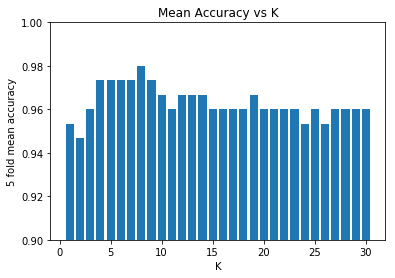

In [21]:
#histogram plotting for comparison between various values of k
plt.bar([i+1 for i in range(0,max_neighbors)], knn_accuracy_mean)
plt.ylim([0.9,1])
plt.xlabel("K")
plt.ylabel("5 fold mean accuracy")
plt.title("Mean Accuracy vs K")
plt.show()

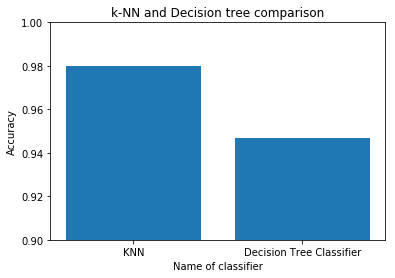

In [24]:
#comparison between knn and dtc
final = ('KNN', 'Decision Tree Classifier')
y_pos = np.arange(len(final))
plt.bar(np.arange(2), [mean_knn_accuracy[7], np.mean(dtc)])
plt.ylim([0.9,1])
plt.title("k-NN and Decision tree comparison")
plt.ylabel("Accuracy")
plt.xlabel("Name of classifier")
plt.xticks(y_pos, final)
plt.show()